In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 4s 2us/step


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
# ニュースサンプルをテキストに変換する
word_index = reuters.get_word_index()

reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join(
            [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#デコードしたレビューの内容を表示
print(decoded_newswire)

557056/550378 [==============================] - 1s 2us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
train_labels[0]

3

In [61]:
# データのエンコーディング
import numpy as np

def vectorixe_sequences(sequences, dimension=10000):
    
    # 形状が(len(sequences), dimension)の行列を作成して０で埋める
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]のインデックスを１に設定
    return results

In [62]:
# 訓練データのベクトル化
x_train = vectorixe_sequences(train_data)
# テストデータのベクトル化
x_test = vectorixe_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [8]:
# ベクトル化された訓練ラベル
one_hot_train_labels = to_one_hot(train_labels)
# ベクトル化されたテストラベル
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
# kerasの関数を使用しても同じことができる
from keras.utils.np_utils import to_categorical

In [12]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
# モデルの定義
from keras import models
from keras import layers

In [63]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [64]:
# モデルのコンパイル
model.compile(optimizer='rmsprop',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [65]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [66]:
# モデルのトレーニング
history = model.fit(partial_x_train,
                partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 305us/step - loss: 2.7090 - acc: 0.5135 - val_loss: 1.7825 - val_acc: 0.6230
Epoch 2/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.4468 - acc: 0.7077 - val_loss: 1.3332 - val_acc: 0.7000
Epoch 3/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.0609 - acc: 0.7855 - val_loss: 1.1352 - val_acc: 0.7670
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.8277 - acc: 0.8316 - val_loss: 1.0370 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.6560 - acc: 0.8672 - val_loss: 0.9701 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.5176 - acc: 0.8965 - val_loss: 0.9132 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.4186 - acc: 0.9151 - val_loss: 0.9138 - val_acc: 0.8090


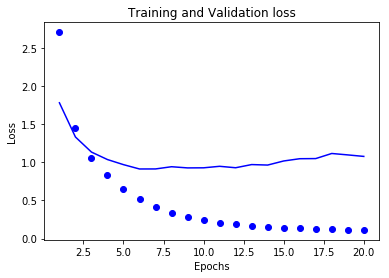

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

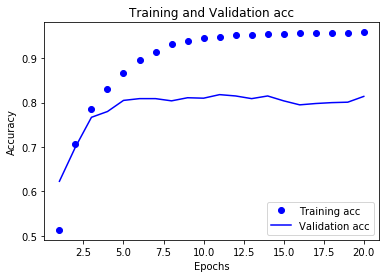

In [68]:
# 正解率をプロット
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [69]:
# モデルの訓練をやり直す
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

model.fit(partial_x_train,
                partial_y_train,
                 epochs=8,
                 batch_size=512,
                 validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 205us/step - loss: 2.6507 - acc: 0.5173 - val_loss: 1.7641 - val_acc: 0.6500
Epoch 2/8
7982/7982 [==============================] - 1s 131us/step - loss: 1.4372 - acc: 0.7057 - val_loss: 1.3106 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 135us/step - loss: 1.0441 - acc: 0.7856 - val_loss: 1.1140 - val_acc: 0.7510
Epoch 4/8
7982/7982 [==============================] - 1s 134us/step - loss: 0.8159 - acc: 0.8296 - val_loss: 1.0368 - val_acc: 0.7910
Epoch 5/8
7982/7982 [==============================] - 1s 140us/step - loss: 0.6475 - acc: 0.8653 - val_loss: 0.9676 - val_acc: 0.7970
Epoch 6/8
7982/7982 [==============================] - 1s 134us/step - loss: 0.5215 - acc: 0.8926 - val_loss: 0.9136 - val_acc: 0.8070
Epoch 7/8
7982/7982 [==============================] - 1s 146us/step - loss: 0.4180 - acc: 0.9162 - val_loss: 0.8950 - val_acc: 0.8150
Epoch 8

In [70]:
predictions = model.predict(x_test)
print(predictions[0].shape)

(46,)


In [72]:
np.argmax(predictions[0])

3